	Initialization Time: 0.288827896118
Finishing step: 0
Finishing step: 5000
Finishing step: 10000
Finishing step: 15000
Finishing step: 20000
Finishing step: 25000
Finishing step: 30000
[[ -1.42471656e-01   1.07815112e-01   1.40537674e-01 ...,   6.37274487e-01   8.87173972e-01   2.98864083e-01]
 [  3.25361633e-02   4.54963759e-01   1.63731250e-01 ...,   8.29565710e-01   4.63532177e-01   2.30593641e-01]
 [  2.98817493e-01   3.68641675e-01   5.92494307e-02 ...,   3.83032926e-01  -8.07114231e-02   5.42602294e-01]
 ..., 
 [ -8.86678796e-03   3.79795732e-01   5.45896489e-01 ...,   8.56425555e-02   5.91926938e-01   6.08507538e-01]
 [  4.28856588e-01   4.76368827e-01   2.61437116e-01 ...,   2.05306632e-01  -1.41048029e-01  -6.49717362e-04]
 [  4.61420998e-01   7.61453284e-01   5.92236685e-01 ...,  -4.61994812e-02  -1.01903965e-01  -7.73869374e-02]]
Total Time 70.6653680801
Pre loop Time 0.00062108039856
Inner loop time 70.0641644001
Outer loop time 0.389564275742
Reduced Dist 4.65312194824
ou

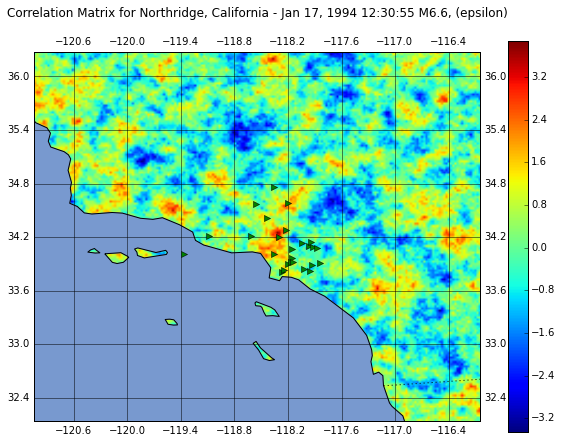

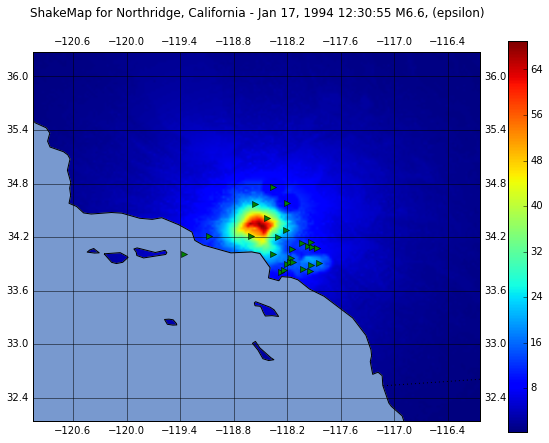

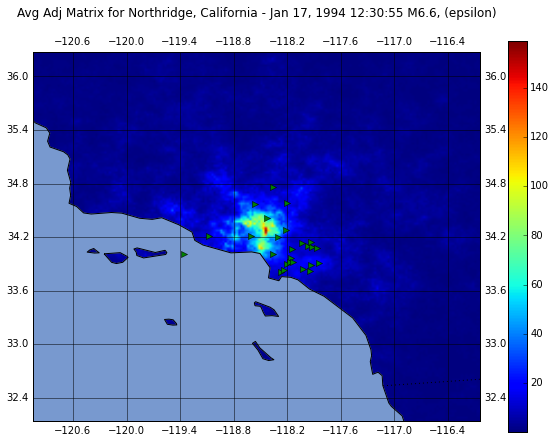

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
from neicio.readstation import readStation
from neicio.shake import ShakeGrid
from neicio.gmt import GMTGrid
import time
from matplotlib import cm
import sys
sys.path.append('/Users/sverros/Documents/Modules')
from Correlation.setup import initialize
from Correlation.loop import main
from Correlation.realizations import realizations
from Correlation.plotting import plot

# Variable of interest                                                                                                                                                                                                        
voi = 'PGA'

# Specify the radius of interest                                                                                                                                                                                              
r = 15

# Specify number of realizations
num_realizations = 0

# Intensity Factor
intensity_factor = 1

# Correlation of vs30 values
vscorr = True

# Get shakemap for desired variable, PGA, uncertainty grid and stationdata                                                                                                                                                    
# Selected Stations: Units in pctg                                                                                                                                                                                            
shakemap = ShakeGrid('Inputs/grid.xml', variable = '%s' % voi)


# Uncertainty Data: Units in ln(pctg)                                                                                                                                                                                         
uncertainty = ShakeGrid('Inputs/uncertainty.xml', variable= 'STD%s' % voi)

# Station Data: Units in pctg                                                                                                                                                                                                 
stationlist = 'Inputs/stationlist.xml'
stationdata = readStation(stationlist)

# Sets up grid spacing, site collections, and other data values
# optional parameters: dm, dn, the grid discritization defaulting to 1
variables = initialize(shakemap, uncertainty, stationdata, vscorr)

# Calculate the random array, stored for testing
rand = []

with open('rand2.txt') as f:
    for line in f:
        rand.append(float(line))
f.close()
#rand = np.random.randn(variables['N']*variables['M'])

# Main program for computing spatial correlation
# Output is a dictionary with the following keys
#     cor- grid of spatially correlated epsilon                                                                                                                                
#     data- grid of ShakeMap data                                                                                                                                              
#     data_new- data with added spatial correlation                                                                                                                            
#     grid_arr- array for storing grid indices for multiple realizations                                                                                                       
#     mu_arr- array for storing Sig21.T*Sig11inv for multiple realizations                                                                                                     
#     sigma_arr- array for storing sigma for multiple realizations  
out = main(variables, r, voi, rand, vscorr, intensity_factor)

#Calculate multiple realizations
realizations(num_realizations, variables['N'], variables['M'], out['grid_arr'], 
                           out['mu_arr'], out['sigma_arr'], variables['uncertaintydata'], out['data'])

plot(out, variables, voi, shakemap, stationdata)
